### By John Henry Oliver Springs + Shadow Wizard Money Gang Jeff

If you have just turned on the QICK board and want to run it from an external computer (Tarly), do the following

1. Find the board's IP address and enter it into the browser's search bar
2. Once you have access to the Jupyter notebooks loaded onto the board (password: "xilinx"), navigate to qick/pyro4/
3. Run the Connectivity-Nameserver.ipynb and Connectivity-Server.ipynb notebooks.
4. Record the nameserver port (variable "*port*") and the proxy name (variable "*name*")
5. Go into the calibration_functions.ipynb notebook on the computer
6. Change the values listed in the "Pyro4 Preamble" first cell as necessary. There is no need to run the cell.

This should be all you need to do to connect to the board. 

Any time you change things in the calibration_functions.py or helpers.py files, be sure to restart the kernel for your changes to be registered here.

Boa sorte/Good luck!

In [1]:
from calibration_functions import *
from helpers import *
# %matplotlib notebook
writetopickle("Q_B", threshold=None, phase=0)

Could not import QickSoc: No module named 'pynq'
Ignore error that says Could not import QickSoc: No Module named 'pynq'. That will not impact the code.
...


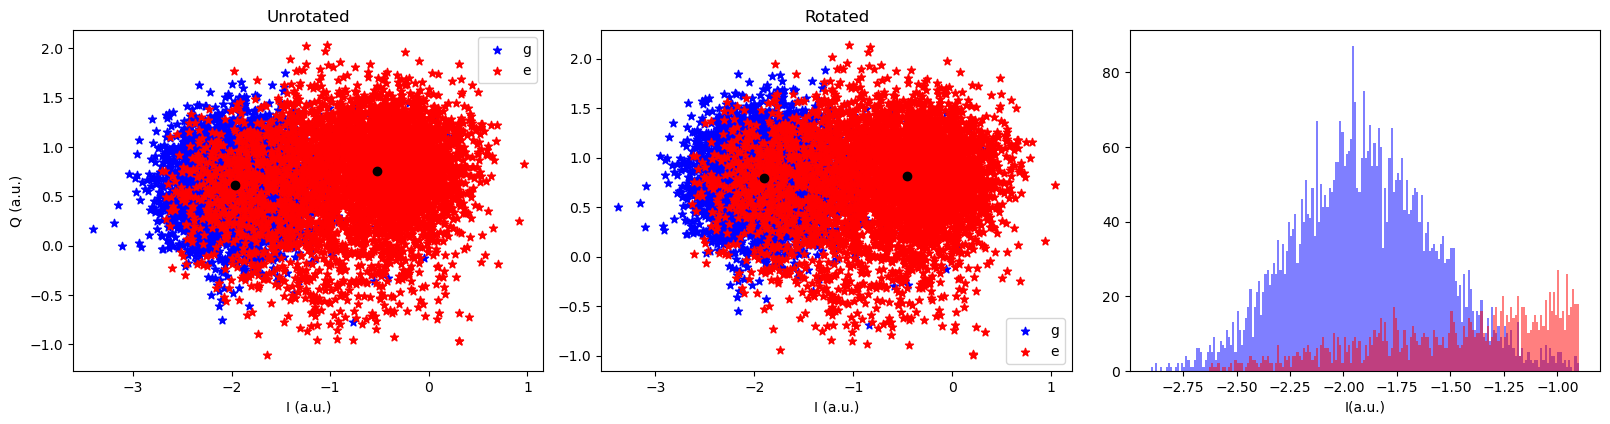

In [2]:
threshold, theta = find_threshold("Q_B", 5000, -0.5, plot=True)

### DO NOT RUN UNLESS YOU HAVE TO
You will have to restart the board after running this to do anything with DC
For some reason we don't have the ability to manually reset board clocks, so this signal and its settings will always be on

In [9]:
ContinuousSignal(ch=2, nqz=2, freq=5000, gain=32767)

  0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
soc.reset_gens()

In [ ]:
DCSignalCont(ch=6,voltage=0.3)

In [3]:
DCSignalPulse(ch=6, pulse_length=16, voltage=0.3)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

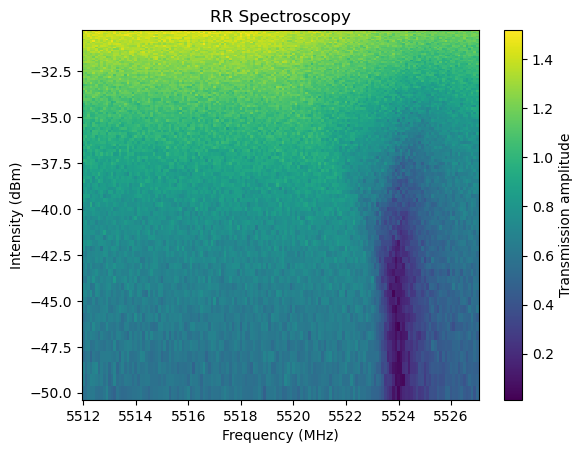

In [7]:
ROFrequency(q_name="Q_B", ro_length=2.0, f_start=5512, f_stop=5527, f_expts=151, g_start=-50, g_stop=-30, g_expts=101, 
            plot=True, save=True, use_dbm=True)

  0%|          | 0/101 [00:00<?, ?it/s]

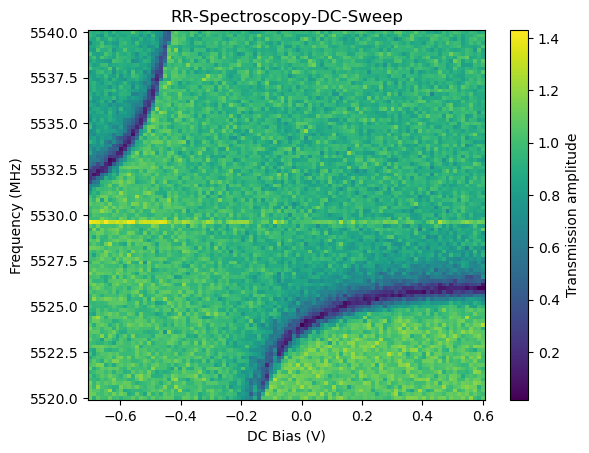

In [8]:
#Collect=False means autocalculate.
dc_arr = DCROFrequency(q_name="Q_B", ro_length=2.0, f_start=5520, f_stop=5540, f_expts=101, dc_start=-0.7, 
                       dc_stop=0.6, dc_expts=101, gain=-50, plot=True, collect=False, use_dbm=True)

  0%|          | 0/101 [00:00<?, ?it/s]

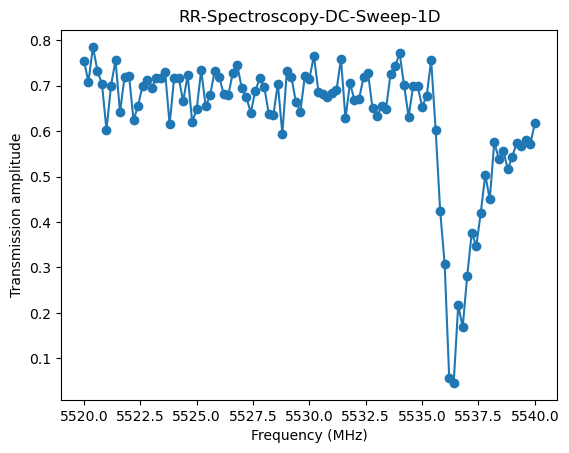

In [5]:
#Collect=False means autocalculate.
dc_arr = DCROFrequency(q_name="Q_B", ro_length=2.0, f_start=5520, f_stop=5540, f_expts=101, dc=-0.5, gain=-50, plot=True, collect=False, use_dbm=True)

  0%|          | 0/51 [00:00<?, ?it/s]

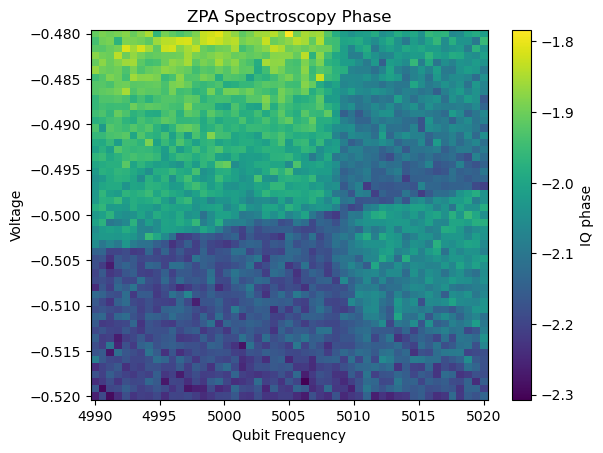

In [33]:
QubitSpectroscopyZPA(q_name="Q_B", expt_type="Phase", probe_length=3.0, gain=5000, reps=100, f_start=4990, 
                  f_stop=5020, f_expts=51, dc=-0.5, zpa_start=-0.02, zpa_stop=0.02, zpa_expts=51,
                    f_res=5534.2, plot=True, collect=False, save=False)

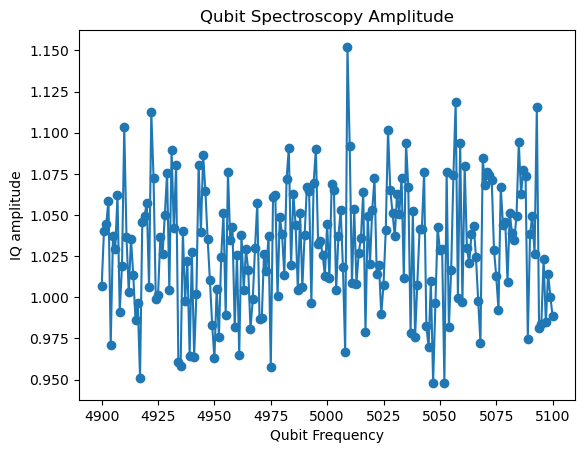

In [6]:
QubitSpectroscopy(q_name="Q_B", expt_type="Amplitude", probe_length=3.0, gain=2000, reps=200, f_start=4900, 
                  f_stop=5100, f_expts=201, dc=-0.5, f_res=5534.2, plot=True, collect=False)

  0%|          | 0/101 [00:00<?, ?it/s]

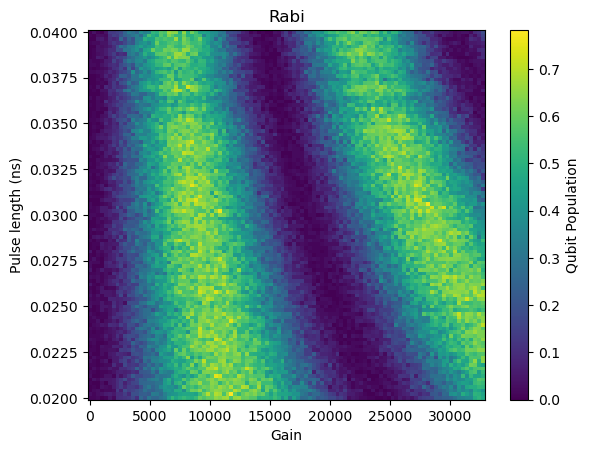

In [27]:
Rabi(q_name="Q_B", l_start=0.02, l_stop=0.04, l_expts=101, g_start=0, g_stop=32767, g_expts=101, reps=101, dc=-0.5, plot=True, save=True)

  0%|          | 0/201 [00:00<?, ?it/s]

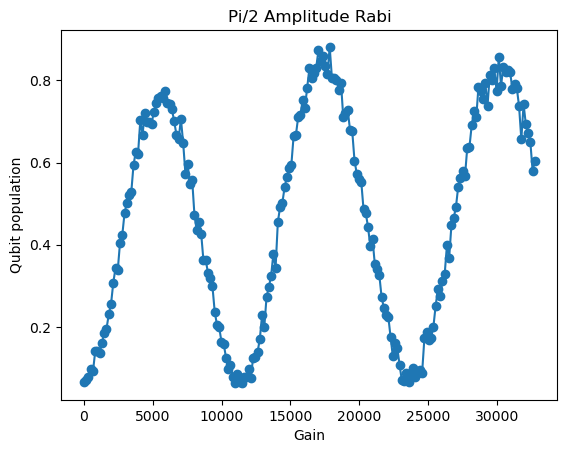

In [22]:
Pi2AmplitudeRabi(q_name="Q_B", length=0.03, g_start=0, g_stop=32767, g_expts=101, reps=101, dc=-0.5, plot=True)

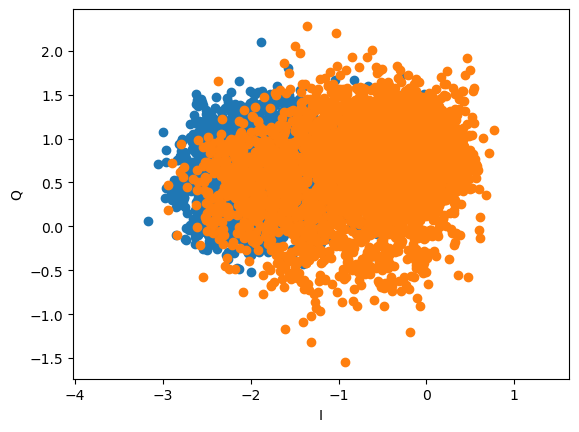

In [44]:
i0, q0, i1, q1 = IQblobs(q_name="Q_B", reps=5000, dc=-0.5, 
                         plot=True, save=True, collect=True)

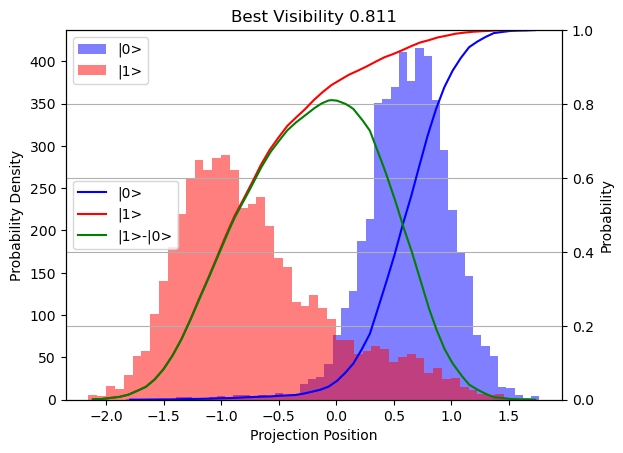

0.8108

In [23]:
calc_visibility(q_name="Q_B", n_datapoints=5000, dc=-0.5, plot=True)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

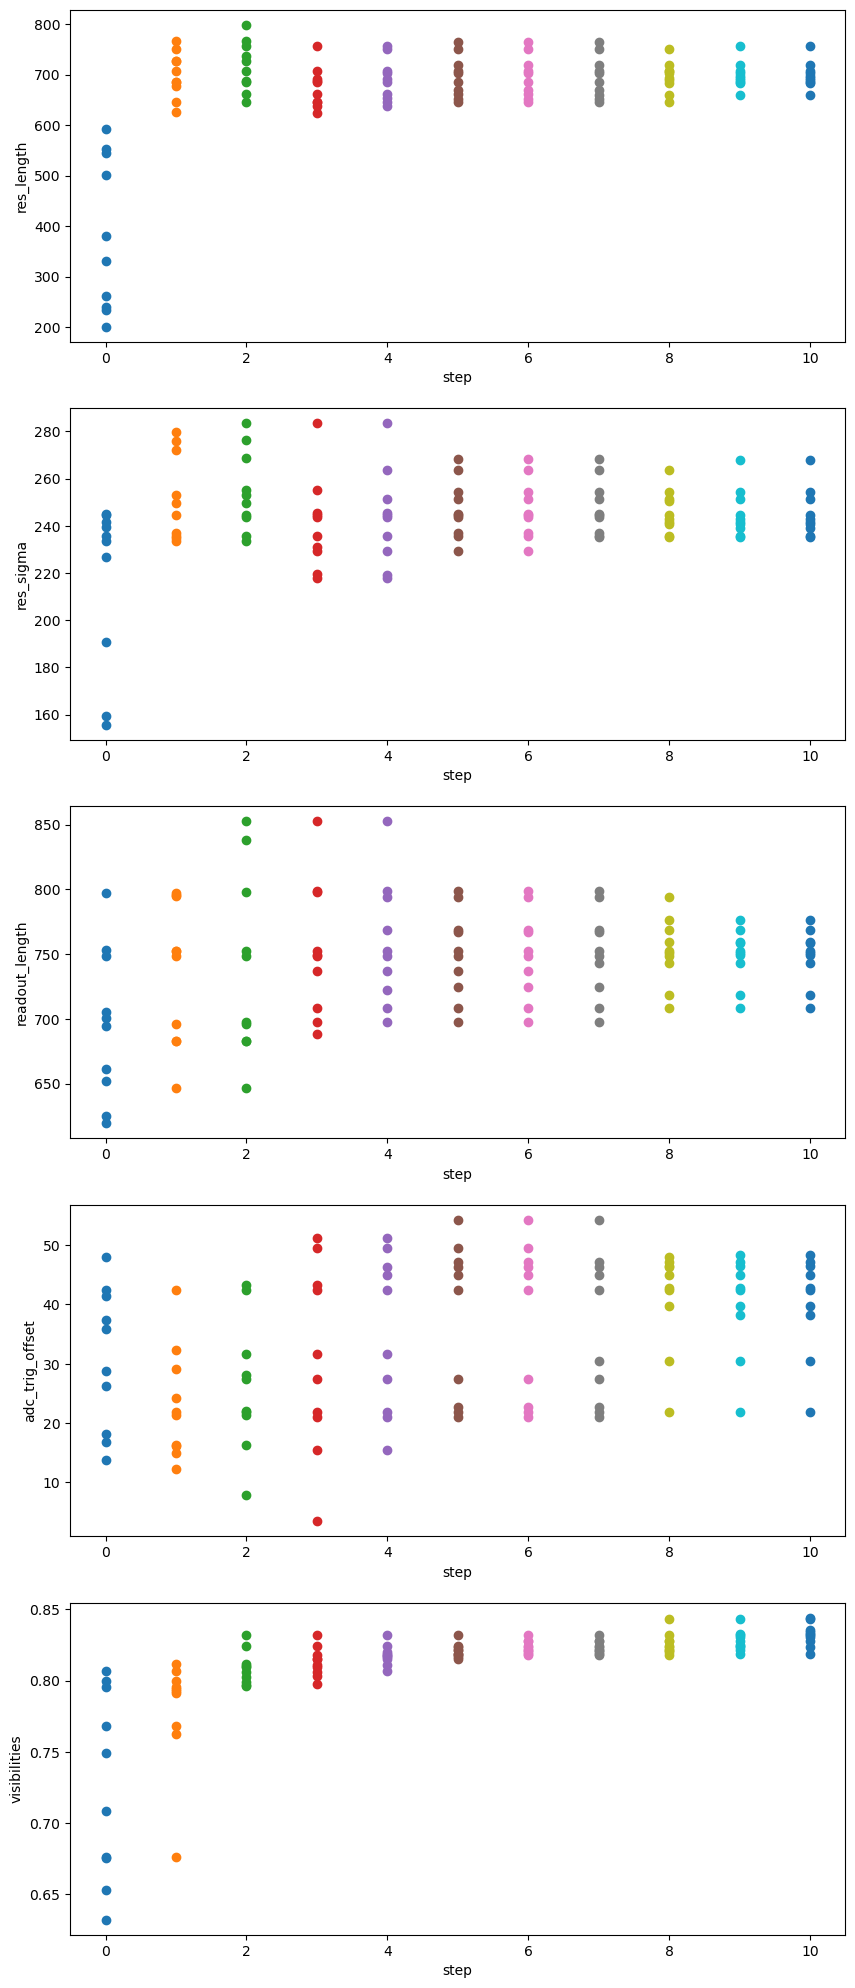

In [3]:
vals, vis = differential_evolution(q_name="Q_B", n_walkers=10, steps=10, thresh=0.8, evol=0.4, 
                                   bounds={"res_length":[200,600], "res_sigma":[150,300], "readout_length":[600,800], "adc_trig_offset":[10,50]},
                                   n_points=5000, dc=-0.5, plot=True, collect=True)

  0%|          | 0/10201 [00:00<?, ?it/s]

4.809526943494343

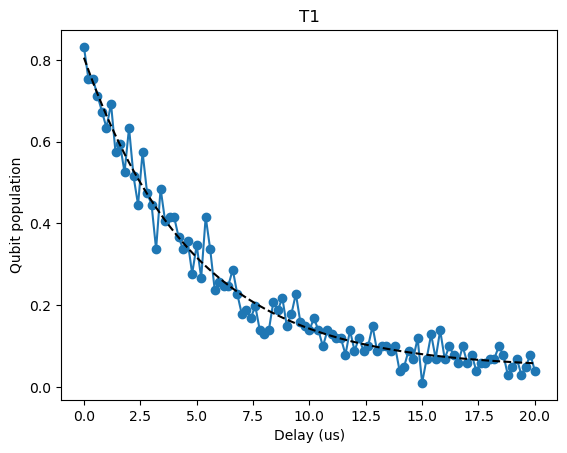

In [8]:
T1(q_name="Q_B", start=0, stop=20, expts=101, reps=101, dc=-0.5, plot=True, save=False, fit=True)

  0%|          | 0/40401 [00:00<?, ?it/s]

{'T2': 0.4256540165907228, 'Detuning': 6.403917050162537}

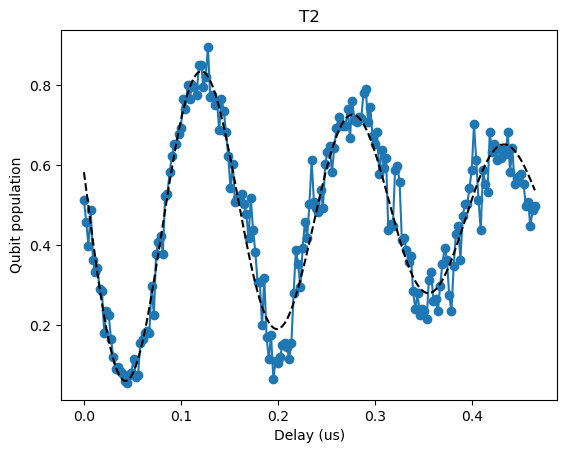

In [9]:
T2(q_name="Q_B", detuning=6, start=0, stop=0.6, p_step=0.72, expts=201, reps=201, dc=-0.5, plot=True, fit=True)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

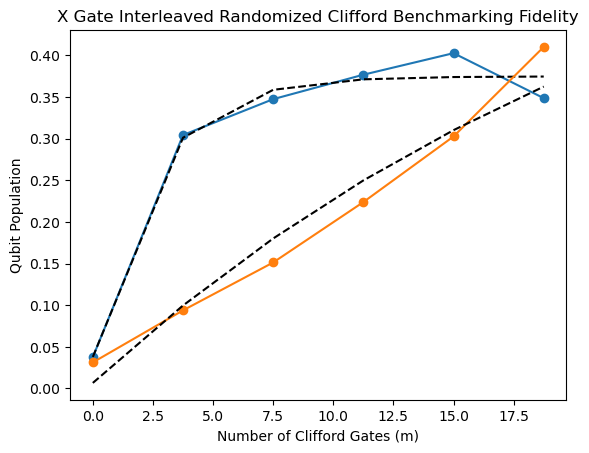

In [12]:
gatelist = ["I","X","Y","X2","Y2","-X2","-Y2","-X","-Y"]
probs, gprobs = SingleGateRandFidelity(q_name="Q_B", m_start=0, m_stop=10, m_expts=6,
                                       gate=1, k=200, reps=800, dc=-0.5, plot=True, save=True, trial="less gates")

  0%|          | 0/51 [00:00<?, ?it/s]

0.30372476778336327

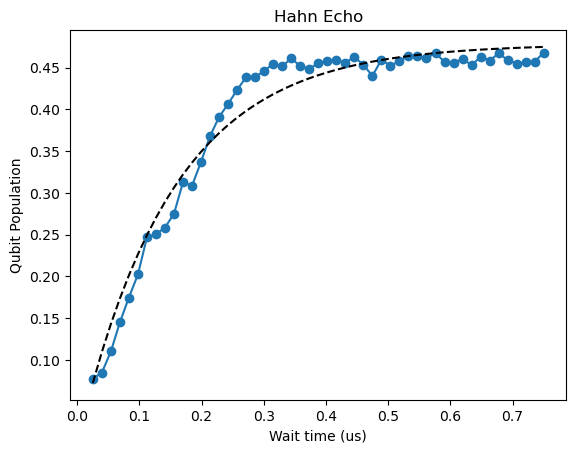

In [8]:
HahnEcho(q_name="Q_B", tau_start=0.05, tau_stop=1.5, tau_expts=51, reps=500, dc=-0.5, plot=True, fit=True)

In [29]:
def CPMG(q_name, tau_arr, reps, detuning, gate_arr, dc, plot=None, save=None, trial=None, collect=None):
    """Function to run a CPMG experiment. Generates CPMG graph and "Hahn echo" graphs for each run

    Parameters:
    tau_arr (float array): total time per each CPMG experiment
    gate_arr (int array): series with each entry reflecting how many X/2 gates there are per trial
    reps (int): number of repetitions used in the sg.acquire() function
    detuning (float): detuning of qubit in MHz
    save (bool): save the .csv and .pdf graphs? If None, nothing is saved
    trial (int): number by which the saved files are labeled
    """
    
    t2s = []
    t2_errs = []

    dict_cfg = loadfrompickle(q_name)
    expt_cfg={"reps":reps, "detuning":detuning, 
                      "sync_time":soccfg.us2cycles(0.01, gen_ch=2), "voltage":dc}
    config={**dict_cfg, **expt_cfg}
    if config["threshold"] is not None:
        corr=config["readout_length"]
    else:
        corr=1

    for n in tqdm(gate_arr):
        n = int(n)
        tau_probs = []
        gates = np.array([3] + [9,1]*n + [9,3])
        config["gate_sequence"]=gates
        for tau in tau_arr:
            wait_seq = np.array([soccfg.us2cycles(tau/(2*n))] + [soccfg.us2cycles(tau/n)]*(n-1) + [soccfg.us2cycles(tau/(2*n))])
            config["wait_sequence"]=wait_seq
            cpmg=summon_gate(soccfg, config)
            avgi, avgq=cpmg.acquire(soc, threshold=config["threshold"], load_pulses=True, 
                                  progress=False,debug=False)
            tau_probs.append(np.sqrt(avgi[0][0]**2+avgq[0][0]**2)*corr)
        
        #forcing curve to go through (0,0) with some tomfoolery
        temp_tau_arr = [0] + list(tau_arr)
        temp_tau_probs = [0] + tau_probs
        #weighting array
        prob_weights = np.empty(len(temp_tau_probs))
        prob_weights.fill(10) #10 is arb
        prob_weights[0] = 0.0001 #this ensures we go through (0,0)
        
        p_guess = [0,0,30]
        p_opt, p_cov = curve_fit(exp_decay, temp_tau_arr, temp_tau_probs, p0 = p_guess)
        p_err = np.sqrt(p_cov)
        t2s.append(p_opt[2])
        t2_errs.append(p_err[2])

        fig, ax = plt.subplots()
        t2string = "T2 = " + str(p_opt[2])
        ax.plot(tau_arr, tau_probs, 'ko', label=t2string)
        xfit = np.linspace(0,tau_arr[-1],1000)
        yfit = exp_decay(xfit, p_opt[0], p_opt[1], p_opt[2])
        ax.plot(xfit, yfit,'-')
        plt.xlabel("Wait time (us)")
        plt.ylabel("Qubit population")
        plt.legend()
    

    plotsave1d(plot=plot, save=save,  q_name=q_name, title="CPMG", 
               trial=trial, xvar=tau_arr, xvarname="Wait time (us)", ydata=t2s, ydataname="T2 time", 
               fitfunc=None, config=config)

In [30]:
CPMG(q_name="Q_B", cpmg_start=-1, cpmg_stop=0, cpmg_expts=11, reps=200, detuning=0, gate_start=1, gate_stop=40, gate_expts=11, dc=-0.5, plot=True)

TypeError: CPMG() got an unexpected keyword argument 'cpmg_start'

In [35]:
class ActiveResetProgram(AveragerProgram):   
    def initialize(self):
        cfg=self.cfg      
        
        self.regwi(0,1,0)

        self.r_thresh = 6
        self.regwi(0,self.r_thresh,int(cfg["threshold"]*cfg["readout_length"]))
        
        self.declare_gen(ch=cfg["qubit_ch"], nqz=2)
        self.declare_readout(ch=0, length=cfg["readout_length"],
                                 freq=cfg["f_res"], gen_ch=cfg["qubit_ch"])
        
        global f_res
        global f_ge
        
        f_res=self.freq2reg(cfg["f_res"], gen_ch=cfg["qubit_ch"], ro_ch=0)
        f_ge=self.freq2reg(cfg["f_ge"], gen_ch=cfg["qubit_ch"])
        
        global phase
        phase=self.deg2reg(cfg["phase"])
        
        self.add_DRAG(ch=cfg["qubit_ch"], name="drive", length=cfg["pulse_length"], sigma=cfg["pulse_length"]/4,
                      delta=cfg["delta"], alpha=cfg["alpha"])
        self.add_gauss(ch=cfg["qubit_ch"], name="measure", sigma=cfg["res_sigma"]/4, length=cfg["res_sigma"])
        
        self.sync_all(self.us2cycles(500))
    
    def body(self):
        cfg=self.cfg
        
        self.set_pulse_registers(ch=cfg["dc_ch"], style="const", phase=0, freq=0, gain=int(dc2gain(cfg["dc_ch"], cfg["voltage"])),
                                 length=cfg["pulse_length"], mode="periodic")
        self.pulse(ch=cfg["dc_ch"])
        
        self.set_pulse_registers(ch=cfg["qubit_ch"], style="arb", waveform="drive", freq=f_ge, gain=cfg["qubit_gain"], phase=0)
        
        self.pulse(ch=cfg["qubit_ch"])
        self.sync_all(self.us2cycles(0.05))
        
        self.set_pulse_registers(ch=cfg["dc_ch"], style="const", phase=0, freq=0, gain=int(dc2gain(cfg["dc_ch"], cfg["voltage"])),
                                 length=cfg["res_length"]+cfg["res_sigma"], mode="periodic")
        self.pulse(ch=cfg["dc_ch"])
        self.set_pulse_registers(ch=cfg["qubit_ch"], style="flat_top", waveform="measure", freq=f_res, length=cfg["res_length"], 
                                 gain=cfg["res_gain"], phase=phase)
        
        self.trigger(adcs=self.ro_chs,
                     pins=[0], 
                     adc_trig_offset=cfg["adc_trig_offset"])
        
        self.pulse(ch=cfg["qubit_ch"])
        self.sync_all(self.us2cycles(0.1))
        
        self.read(0,0,"lower",2)
        self.read(0,0,"upper",3)
        self.mathi(0,self.r_thresh,self.r_thresh,'+',10000)
        self.mathi(0,2,2,'+',10000)
        self.mathi(0,3,3,'+',10000)
        self.condj(0,2,'<',self.r_thresh,'after_reset')
        
        self.set_pulse_registers(ch=cfg["dc_ch"], style="const", phase=0, freq=0, gain=int(dc2gain(cfg["dc_ch"], cfg["voltage"])),
                                 length=cfg["pulse_length"], mode="periodic")
        self.pulse(ch=cfg["dc_ch"])
        self.set_pulse_registers(ch=cfg["qubit_ch"], style="arb", waveform="drive", freq=f_ge, gain=cfg["pi_gain"], phase=0)
        self.pulse(ch=cfg["qubit_ch"])
        self.sync_all(self.us2cycles(0.05))

        self.label('after_reset')
        
        self.set_pulse_registers(ch=cfg["dc_ch"], style="const", phase=0, freq=0, gain=int(dc2gain(cfg["dc_ch"], cfg["voltage"])),
                                 length=cfg["res_length"]+cfg["res_sigma"], mode="periodic")
        self.pulse(ch=cfg["dc_ch"])
        self.set_pulse_registers(ch=cfg["qubit_ch"], style="flat_top", waveform="measure", freq=f_res, length=cfg["res_length"], 
                                  gain=cfg["res_gain"], phase=phase)
        self.measure(pulse_ch=self.cfg["qubit_ch"], 
              adcs=[0],
              adc_trig_offset=self.cfg["adc_trig_offset"],
              wait=True,
              syncdelay=self.us2cycles(self.cfg["relax_delay"]))

In [36]:
def ActiveReset(q_name, start, stop, expts, reps, dc, plot=None):
    
    expt_cfg={"start":start, "stop":stop, "expts":expts, "reps": reps, "voltage": dc
       }
    
    dict_cfg = loadfrompickle(q_name)
    config={**dict_cfg, **expt_cfg}     

    expt_pts=np.linspace(start, stop, expts).astype(int)
    pre_reset=[]
    post_reset=[]
    for i in tqdm(expt_pts):
        config["qubit_gain"]=i
        areset=ActiveResetProgram(soccfg, config)
        avgi, avgq = areset.acquire(soc, readouts_per_experiment=2, threshold=config["threshold"], load_pulses=True, progress=False)
        pre_reset.append(avgi[0][0]*config["readout_length"])
        post_reset.append(avgi[0][1]*config["readout_length"])
    
    plt.plot(expt_pts,pre_reset,'o-', label="pre-reset")
    plt.plot(expt_pts,post_reset, 'o-', label="post-reset")

  0%|          | 0/100 [00:00<?, ?it/s]

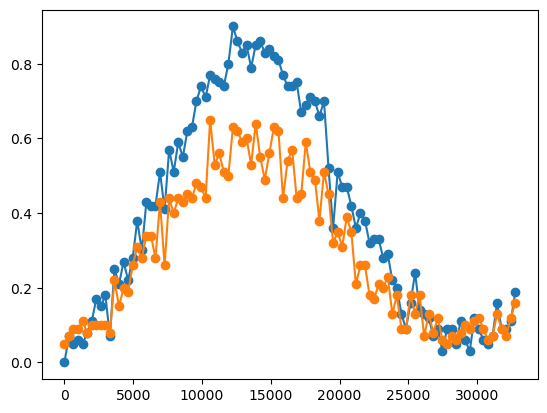

In [39]:
ActiveReset("Q_B", 0, 32767, 100, 100, -0.5, plot=True)

In [323]:
class RamseyModProgram(RAveragerProgram):
    def initialize(self):
        cfg=self.cfg
        
        self.q_rp=self.ch_page(cfg["qubit_ch"])     # get register page for qubit_ch
        self.r_wait = 3
        self.r_wait2 = 4
        self.r_phase2 = 5
        self.r_phase=self.sreg(cfg["qubit_ch"], "phase")
        self.regwi(self.q_rp, self.r_wait, cfg["start"])
        self.regwi(self.q_rp, self.r_wait2, cfg["drive_ro_delay"])
        self.regwi(self.q_rp, self.r_phase2, 0)
        
        self.declare_gen(ch=cfg["qubit_ch"], nqz=2) #Qubit
        
        for ch in [0,1]:
            self.declare_readout(ch=ch, length=cfg["readout_length"],
                                 freq=cfg["f_res"], gen_ch=cfg["qubit_ch"])
        
        global phase
        phase=self.deg2reg(cfg["phase"])
        self.add_DRAG(ch=cfg["qubit_ch"], name="drive", length=cfg["pulse_length"], sigma=cfg["pulse_length"]/4,
                      delta=cfg["delta"], alpha=cfg["alpha"])
        self.add_gauss(ch=cfg["qubit_ch"], name="measure", sigma=cfg["res_sigma"]/4, length=cfg["res_sigma"])
        #self.add_pulse(ch=cfg["dc_ch"], name="dc", idata=gen_dc_waveform(gen=cfg["dc_ch"], b_volt=cfg["voltage"],
          #                                                             m_volt=cfg["mod_voltage"], freq=cfg["f_mod"]))
        self.add_pulse(ch=cfg["dc_ch"], name="dc", idata=gen_dc_waveform(gen=cfg["dc_ch"], b_volt=cfg["voltage"])[:48])
        #print(gen_dc_waveform(gen=cfg["dc_ch"], b_volt=cfg["voltage"])[:50])
        self.synci(200)
        
    def body(self):
        cfg=self.cfg
        
        f_res=self.freq2reg(cfg["f_res"], gen_ch=cfg["qubit_ch"], ro_ch=0) # conver f_res to dac register value
        f_ge=self.freq2reg(cfg["f_ge"], gen_ch=cfg["qubit_ch"])
        
        self.set_pulse_registers(ch=cfg["dc_ch"], outsel="input", style="arb", phase=0, freq=0, gain=32767,
                                 waveform="dc", mode="periodic")
        #self.set_pulse_registers(ch=cfg["dc_ch"], style="const", phase=0, freq=0, gain=int(dc2gain(cfg["dc_ch"], cfg["voltage"])),
         #                        length=cfg["pulse_length"], mode="periodic")

        self.pulse(ch=cfg["dc_ch"])

        self.set_pulse_registers(ch=cfg["qubit_ch"], style="arb", freq=f_ge, phase=0, gain=int(cfg["pi_gain"]/2), 
                                 waveform="drive")
        
        self.regwi(self.q_rp, self.r_phase, 0)
        
        self.pulse(ch=self.cfg["qubit_ch"])  #play probe pulse
        self.mathi(self.q_rp, self.r_phase, self.r_phase2,"+",0)
        self.sync(self.q_rp,self.r_wait)

        self.pulse(ch=self.cfg["qubit_ch"])  #play probe pulse
        #self.sync(self.q_rp, self.r_wait2)
        self.sync_all(cfg["drive_ro_delay"])

        self.set_pulse_registers(ch=cfg["dc_ch"], style="const", phase=0, freq=0, gain=int(dc2gain(cfg["dc_ch"], cfg["voltage"])),
                                 length=cfg["res_length"]+cfg["res_sigma"], mode="periodic")

        self.pulse(ch=cfg["dc_ch"])

        self.set_pulse_registers(ch=cfg["qubit_ch"], style="flat_top", waveform="measure", freq=f_res, length=cfg["res_length"], 
                                 gain=cfg["res_gain"], phase=phase)
        
        self.trigger(adcs=self.ro_chs,
                     pins=[0], 
                     adc_trig_offset=cfg["adc_trig_offset"])
        
        self.pulse(ch=cfg["qubit_ch"])
        self.wait_all()
        self.sync_all(self.us2cycles(self.cfg["relax_delay"]))

        
    def update(self):
        self.mathi(self.q_rp, self.r_wait, self.r_wait, '+', self.cfg["step"]) # update the time between two π/2 pulses
        self.mathi(self.q_rp, self.r_phase2, self.r_phase2, '+', self.cfg["phase_step"]) # advance the phase of the LO for the second π/2 pulse

def T2Mod(q_name=None, detuning=None, start=None, stop=None, p_step=None, expts=None, reps=None, dc=None, dc_mod=None, 
          f_mod=None, plot=None, save=None, trial=None, collect=None, fit=None):
    
    """
    Ramsey T2 Experiment
    
    :param q_name: name of the qubit in dict_cfg
    :param detuning: detuning from drive frequency [MHz]
    :param start: starting delay [us]
    :param stop: maximum delay [us]
    :param p_step: phase step [degrees]
    :param expts: delay points (int)
    :param reps: # of reps to be averaged over (int)
    :param dc: dc voltage [V]
    :param plot: if True, plots the data
    :param save: if True, saves the data
    :param collect: if True, returns data. Returns T2 and actual detuning if False or None.
    
    """

    if q_name==None or detuning==None or start==None or stop==None or p_step==None or expts==None or reps==None or dc==None:
        raise Exception("You must specify q_name, detuning, start, stop, p_steps, expts, reps, and dc")
    
    step=(stop-start)/expts
    expt_cfg={"start":soccfg.us2cycles(start), "step":soccfg.us2cycles(step), "phase_step": soccfg.deg2reg(p_step, gen_ch=2),
              "expts":expts, "reps": reps, "rounds": 1, "voltage":dc, "mod_voltage":dc_mod, "f_mod":f_mod
           }
    dict_cfg = loadfrompickle(q_name)
    config={**dict_cfg, **expt_cfg}

    config["f_ge"]-=detuning
    if config["threshold"] is not None:
        corr=config["readout_length"]
    else:
        corr=1
    t2p=RamseyModProgram(soccfg, config)
    x_pts, avgi, avgq= t2p.acquire(soc,threshold=config["threshold"], load_pulses=True,progress=True, debug=False)
    x_pts = soccfg.cycles2us(x_pts)
    results=np.sqrt(avgi[0][0]**2+avgq[0][0]**2)*corr
    
    if fit:
        try:
            loc_pt1 = np.argmax(results)
            loc_pt2 = np.argmin(results)
            
            A = np.max(results)-np.mean(results)
            W=np.pi/(x_pts[loc_pt1]-x_pts[loc_pt2])
            B=np.mean(results)
            T=-(x_pts[loc_pt1]-x_pts[loc_pt2])/np.log((np.max(results[2*loc_pt1-loc_pt2:])-np.mean(results))/
                                                      (np.max(results)-np.mean(results)))
            
            p_guess=[A, W, T, B, 0]
            p_optt2, p_covt2 = curve_fit(t2fit, x_pts, results, p0 = p_guess)
            p_errt2 = np.sqrt(np.diag(p_covt2))
            fitfunc=t2fit(x_pts,p_optt2[0],p_optt2[1],p_optt2[2],p_optt2[3],p_optt2[4])
            Delta=p_optt2[1]/(2*np.pi)
            info={'T2':p_optt2[2], 'Detuning':Delta}
        except:
            info=0
            print('Fit did not converge')
    else:
        fitfunc=None
    
    plotsave1d(plot=plot, save=save, q_name=q_name, title="T2", trial=trial, xvar=x_pts,
               xvarname="Delay (us)", ydata=results, ydataname="Qubit population", fitfunc=fitfunc, config=config)
    
    if collect:
        return results
    else:
        if fit:
            return info

  0%|          | 0/40401 [00:00<?, ?it/s]

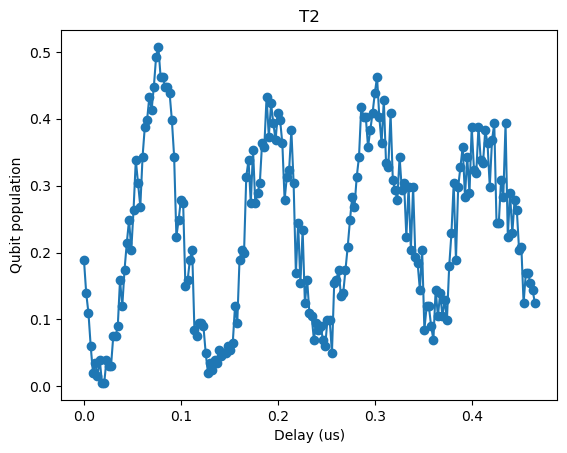

In [325]:
T2Mod(q_name="Q_B", detuning=7, start=0, stop=0.6, p_step=0.72, expts=201, reps=201, dc=-0.5, dc_mod=0, f_mod=1, plot=True)

  0%|          | 0/40401 [00:00<?, ?it/s]

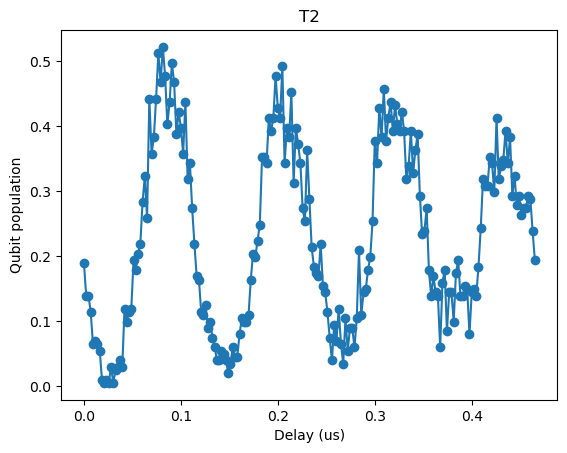

In [300]:
T2(q_name="Q_B", detuning=6, start=0, stop=0.6, p_step=0.72, expts=201, reps=201, dc=-0.5, plot=True, fit=False)

## Implement save on differential_evolution (xfinal[-1], xvalsfinal[-1])